<a href="https://colab.research.google.com/github/nadyavirianta/MachineLearning/blob/master/Tugas_5_ML_Implementasi_CNN_untuk_data_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas 5 Machine Learning
### Implementasi CNN dengan data MNIST
### Nadya Avirianta S
### 16/394096/PA/17187

In [1]:
#import library 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn
import random     

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
#import dataset MNIST
from keras.datasets import mnist  
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

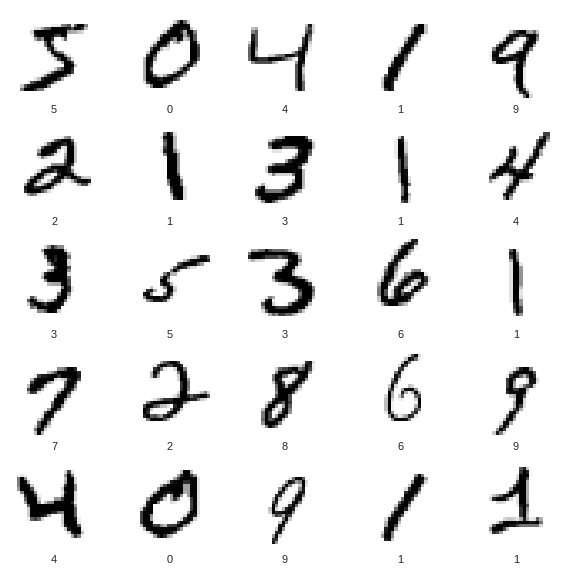

In [11]:
#Visualisasi data MNIST 
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [12]:
# Normalisasi input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train/=255
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test/=255
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [13]:
#ubah target classnya menjadi one hot
from  keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Artitektur CNN

In [0]:
#import library untuk membuat model CNN
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, BatchNormalization

In [0]:
#Membuat arsitektur CNN 

classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(32, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Conv2D(64, (3,3)))
BatchNormalization(axis=-1)
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
               
               
classifier.add(Flatten())
BatchNormalization()
classifier.add(Dense(512))
BatchNormalization()
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

In [39]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_26 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_27 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          18496     
__________

In [0]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

In [0]:
training_set= train_gen.flow(X_train, y_train, batch_size=64)
test_set= train_gen.flow(X_test, y_test, batch_size=64)

In [47]:
history = classifier.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=20)

Epoch 1/20
937/937 [==============================] - 11s 11ms/step - loss: 0.0990 - acc: 0.9697 - val_loss: 0.0718 - val_acc: 0.9781
Epoch 2/20
937/937 [==============================] - 10s 11ms/step - loss: 0.0671 - acc: 0.9792 - val_loss: 0.0607 - val_acc: 0.9809
Epoch 3/20
937/937 [==============================] - 10s 11ms/step - loss: 0.0528 - acc: 0.9833 - val_loss: 0.0611 - val_acc: 0.9822
Epoch 4/20
937/937 [==============================] - 10s 11ms/step - loss: 0.0444 - acc: 0.9857 - val_loss: 0.0598 - val_acc: 0.9836
Epoch 5/20
937/937 [==============================] - 10s 11ms/step - loss: 0.0344 - acc: 0.9889 - val_loss: 0.0472 - val_acc: 0.9861
Epoch 6/20
937/937 [==============================] - 10s 11ms/step - loss: 0.0308 - acc: 0.9896 - val_loss: 0.0438 - val_acc: 0.9873
Epoch 7/20
937/937 [==============================] - 10s 11ms/step - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0506 - val_acc: 0.9866
Epoch 8/20
937/937 [==============================] - 10s 11ms

In [48]:
classifier.evaluate_generator(test_set,10000)

[0.07538438148087992, 0.9869027582395499]

In [0]:
#untuk plotting akurasi dan loss 

def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

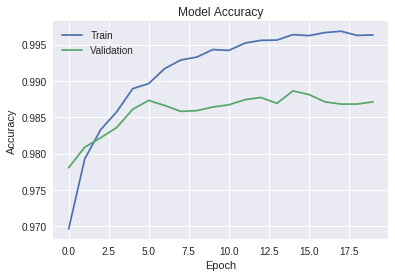

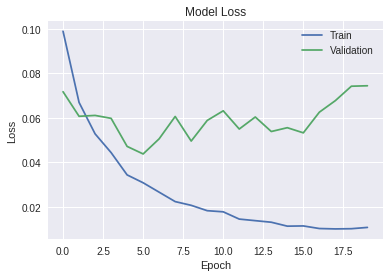

In [50]:
plot_history(history)